In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("hdi.csv")

In [3]:
df.head()

,Entity,Code,Year,Human Development Index (UNDP)
0,Afghanistan,AFG,1980,0.228
1,Afghanistan,AFG,1985,0.273
2,Afghanistan,AFG,2002,0.373
3,Afghanistan,AFG,2003,0.383
4,Afghanistan,AFG,2004,0.398


In [4]:
df.dtypes

Entity                             object
Code                               object
Year                                int64
Human Development Index (UNDP)    float64
dtype: object

In [5]:
year_country = df.pivot_table(index = "Entity",columns = "Year",values = "Human Development Index (UNDP)",aggfunc = "mean")

In [6]:
year_country

Year,1980,1985,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.228,0.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
Albania,0.625,0.623,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
Algeria,NaN,NaN,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.628,0.632,0.634,0.644,0.651,0.653,0.654,0.658,0.660,0.664,...,0.753,0.753,0.759,0.771,0.774,0.776,0.778,0.775,0.766,0.761
Vietnam,0.463,0.479,0.475,0.484,0.496,0.506,0.517,0.529,0.540,0.539,...,0.640,0.656,0.654,0.664,0.670,0.675,0.678,0.684,0.689,0.694
Yemen,NaN,NaN,0.399,0.403,0.405,0.408,0.409,0.415,0.422,0.427,...,0.485,0.491,0.498,0.499,0.505,0.507,0.505,0.483,0.462,0.452


In [7]:
year_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Entity', length=190)

In [8]:
year_country.columns

Index([1980, 1985, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017],
      dtype='int64', name='Year')

In [9]:
df_use = year_country.reset_index(names = "country")

In [10]:
df_use

Year,country,1980,1985,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.228,0.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,Albania,0.625,0.623,0.645,0.626,0.610,0.613,0.619,0.632,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,Algeria,NaN,NaN,0.577,0.581,0.587,0.591,0.595,0.600,0.608,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Venezuela,0.628,0.632,0.634,0.644,0.651,0.653,0.654,0.658,0.660,...,0.753,0.753,0.759,0.771,0.774,0.776,0.778,0.775,0.766,0.761
186,Vietnam,0.463,0.479,0.475,0.484,0.496,0.506,0.517,0.529,0.540,...,0.640,0.656,0.654,0.664,0.670,0.675,0.678,0.684,0.689,0.694
187,Yemen,NaN,NaN,0.399,0.403,0.405,0.408,0.409,0.415,0.422,...,0.485,0.491,0.498,0.499,0.505,0.507,0.505,0.483,0.462,0.452
188,Zambia,0.418,0.409,0.401,0.402,0.403,0.409,0.408,0.412,0.416,...,0.517,0.533,0.544,0.556,0.569,0.574,0.580,0.583,0.586,0.588


In [11]:
df_use.index.name = "Index"

In [12]:
df_use.head()

Year,country,1980,1985,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Index,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,0.228,0.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,Albania,0.625,0.623,0.645,0.626,0.610,0.613,0.619,0.632,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,Algeria,NaN,NaN,0.577,0.581,0.587,0.591,0.595,0.600,0.608,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [13]:
df_use.isna().sum()

Year
country     0
1980       86
1985       78
1990       47
1991       46
1992       49
1993       46
1994       46
1995       42
1996       42
1997       42
1998       42
1999       39
2000       17
2001       17
2002       15
2003       13
2004       10
2005        3
2006        3
2007        3
2008        3
2009        3
2010        1
2011        1
2012        1
2013        1
2014        1
2015        1
2016        1
2017        0
dtype: int64

In [14]:
df_2005_na = df_use.loc[:,2005:]

In [15]:
imput = SimpleImputer()

In [16]:
df_2005_imput = imput.fit_transform(df_2005_na)

In [26]:
df_2005_year = pd.DataFrame(df_2005_imput,columns = df_2005_na.columns)

In [27]:
df_2005_year.head()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.408,0.417,0.429,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,0.704,0.711,0.720,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,0.692,0.698,0.707,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,0.455,0.471,0.492,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [28]:
df_2005 = pd.DataFrame(df_use.loc[:,"country"]).join(df_2005_year)

In [29]:
df_2005.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Index,,,,,,,,,,,,,,
0,Afghanistan,0.408,0.417,0.429,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,Albania,0.704,0.711,0.720,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,Algeria,0.692,0.698,0.707,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,Andorra,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,Angola,0.455,0.471,0.492,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [30]:
df_2005.isna().sum()

country    0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [75]:
#If you have n samples, linkage matrix has n − 1 rows
mergings = linkage(df_2005_year,method = "complete")

In [76]:
mergings.shape

(189, 4)

In [77]:
mergings

array([[9.00000000e+01, 1.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.60000000e+01, 1.22000000e+02, 1.00498756e-02, 2.00000000e+00],
       [8.00000000e+00, 6.40000000e+01, 1.03923048e-02, 2.00000000e+00],
       [1.32000000e+02, 1.50000000e+02, 1.14891253e-02, 2.00000000e+00],
       [1.30000000e+01, 9.30000000e+01, 1.17046999e-02, 2.00000000e+00],
       [8.40000000e+01, 1.74000000e+02, 1.17898261e-02, 2.00000000e+00],
       [8.20000000e+01, 8.50000000e+01, 1.23693169e-02, 2.00000000e+00],
       [6.10000000e+01, 1.36000000e+02, 1.23693169e-02, 2.00000000e+00],
       [3.00000000e+01, 5.90000000e+01, 1.28452326e-02, 2.00000000e+00],
       [5.00000000e+01, 1.35000000e+02, 1.29228480e-02, 2.00000000e+00],
       [6.70000000e+01, 1.11000000e+02, 1.38564065e-02, 2.00000000e+00],
       [9.90000000e+01, 1.91000000e+02, 1.41774469e-02, 3.00000000e+00],
       [5.60000000e+01, 1.88000000e+02, 1.44568323e-02, 2.00000000e+00],
       [1.18000000e+02, 1.20000000e+02, 1.53948043e

In [78]:
pd.set_option('display.max_columns', 190)

In [79]:
with pd.option_context('display.max_rows', None):
    print(df_2005["country"])

Index
0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                               Austria
10                           Azerbaijan
11                              Bahamas
12                              Bahrain
13                           Bangladesh
14                             Barbados
15                              Belarus
16                              Belgium
17                               Belize
18                                Benin
19                               Bhutan
20                              Bolivia
21               Bosnia and Herzegovina
22                             Botswana
23                               Brazil
24                               B

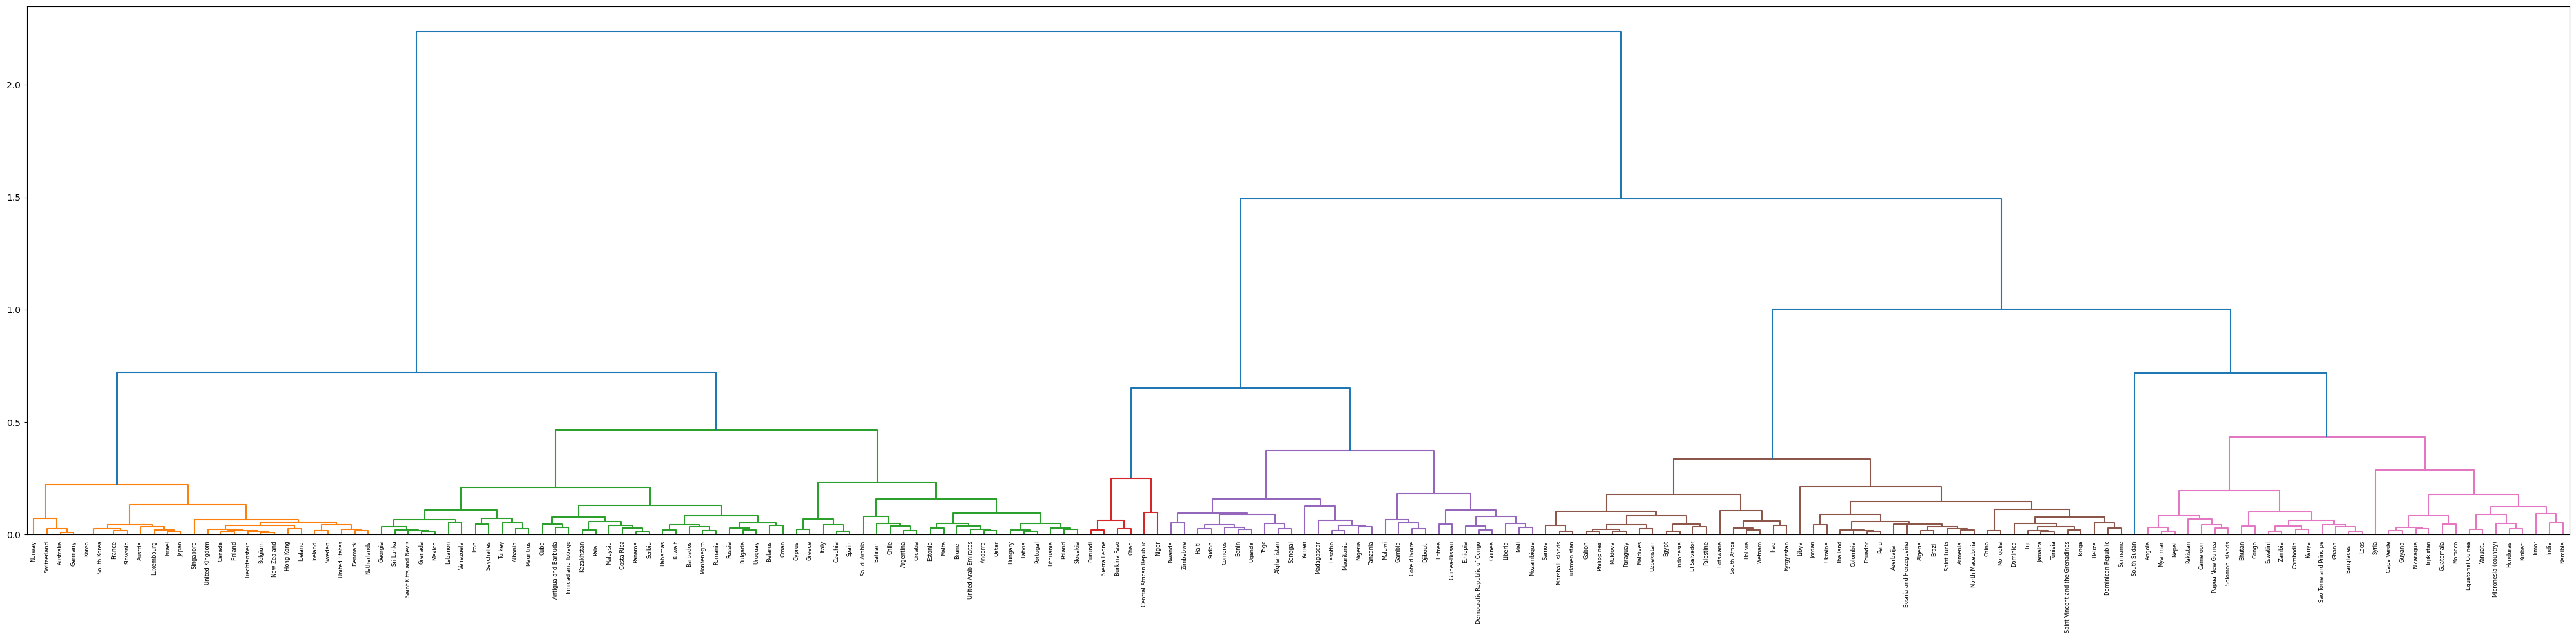

In [104]:
plt.figure(figsize=(40, 10))

dendrogram(mergings, labels = df_2005["country"].values,color_threshold=0.5,
           leaf_rotation=90,
           leaf_font_size=6,)
plt.tight_layout()

plt.show()

In [99]:
label = fcluster(mergings, t=1, criterion='distance')

In [100]:
label.shape

(190,)

In [101]:
label

array([2, 1, 3, 1, 4, 1, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 1, 3, 2, 4, 3, 3,
       3, 3, 1, 1, 2, 2, 4, 4, 1, 4, 2, 2, 1, 3, 3, 2, 4, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 3, 3, 3, 3, 3, 4, 2, 1, 4, 2, 3, 1, 1, 3, 2, 1, 1, 4,
       1, 1, 4, 2, 2, 4, 2, 4, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       4, 4, 1, 1, 3, 4, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 3, 2, 1, 3, 2,
       1, 1, 4, 3, 3, 1, 4, 2, 4, 4, 4, 1, 1, 4, 2, 2, 3, 1, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 4, 1, 2, 1, 1, 2, 1,
       1, 1, 4, 3, 1, 4, 1, 1, 2, 3, 1, 1, 4, 4, 2, 3, 4, 2, 3, 1, 3, 1,
       3, 2, 3, 1, 1, 1, 1, 3, 4, 1, 3, 2, 4, 2], dtype=int32)

In [105]:
pd.set_option("display.max_rows",None)
df_cluster = pd.DataFrame({"labels" :label,"country" : df_2005["country"]})

In [112]:
df_cluster

,labels,country
Index,,
0,2,Afghanistan
1,1,Albania
2,3,Algeria
3,1,Andorra
4,4,Angola
5,1,Antigua and Barbuda
6,1,Argentina
7,3,Armenia
8,1,Australia


In [109]:
pd.crosstab(df_cluster["labels"],df_cluster["country"])

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Korea,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [141]:
country_regions = {

    "North America": ["Canada", "United States"],

    "Central America": [
        "Belize","Costa Rica","El Salvador","Guatemala",
        "Honduras","Nicaragua","Panama"
    ],

    "Caribbean": [
        "Antigua and Barbuda","Bahamas","Barbados","Cuba",
        "Dominica","Dominican Republic","Grenada","Haiti",
        "Jamaica","Saint Kitts and Nevis","Saint Lucia",
        "Saint Vincent and the Grenadines","Trinidad and Tobago"
    ],

    "South America": [
        "Argentina","Bolivia","Brazil","Chile","Colombia",
        "Ecuador","Guyana","Paraguay","Peru",
        "Suriname","Uruguay","Venezuela"
    ],

    "Western Europe": [
        "Austria","Belgium","France","Germany",
        "Liechtenstein","Luxembourg",
        "Netherlands","Switzerland"
    ],

    "Northern Europe": [
        "Denmark","Estonia","Finland","Iceland",
        "Ireland","Latvia","Lithuania",
        "Norway","Sweden","United Kingdom"
    ],

    "Southern Europe": [
        "Andorra","Croatia","Cyprus","Greece",
        "Italy","Malta","Portugal","Spain"
    ],

    "Balkans": [
        "Albania","Bosnia and Herzegovina",
        "Bulgaria","Montenegro",
        "North Macedonia","Serbia","Slovenia"
    ],

    "Eastern Europe": [
        "Belarus","Czechia","Hungary",
        "Moldova","Poland","Romania",
        "Slovakia","Ukraine","Russia"
    ],

    "Caucasus": ["Armenia","Azerbaijan","Georgia"],

    "Central Asia": [
        "Kazakhstan","Kyrgyzstan",
        "Tajikistan","Turkmenistan","Uzbekistan"
    ],

    "Middle East": [
        "Bahrain","Iran","Iraq","Israel",
        "Jordan","Kuwait","Lebanon","Oman",
        "Palestine","Qatar","Saudi Arabia",
        "Syria","Turkey","United Arab Emirates","Yemen"
    ],

    "South Asia": [
        "Afghanistan","Bangladesh","Bhutan",
        "India","Maldives","Nepal",
        "Pakistan","Sri Lanka"
    ],

    "East Asia": [
        "China","Hong Kong","Japan",
        "Mongolia","Korea","South Korea"
    ],

    "Southeast Asia": [
        "Brunei","Cambodia","Indonesia","Laos",
        "Malaysia","Myanmar","Philippines",
        "Singapore","Thailand","Timor","Vietnam"
    ],

    "Oceania": [
        "Australia","Fiji","Kiribati",
        "Marshall Islands","Micronesia (country)",
        "New Zealand","Palau","Papua New Guinea",
        "Samoa","Solomon Islands","Tonga","Vanuatu"
    ],

    "North Africa": [
        "Algeria","Egypt","Libya",
        "Morocco","Sudan","Tunisia"
    ],

    "West Africa": [
        "Benin","Burkina Faso","Cape Verde","Gambia",
        "Ghana","Guinea","Guinea-Bissau",
        "Liberia","Mali","Mauritania",
        "Niger","Nigeria","Senegal",
        "Sierra Leone","Togo","Cote d'Ivoire"
    ],

    "Central Africa": [
        "Cameroon","Central African Republic","Chad",
        "Congo","Democratic Republic of Congo",
        "Equatorial Guinea","Gabon","Sao Tome and Principe","Mexico"
    ],

    "East Africa": [
        "Burundi","Comoros","Djibouti","Eritrea",
        "Ethiopia","Kenya","Madagascar",
        "Malawi","Mauritius","Mozambique",
        "Rwanda","Seychelles","Somalia",
        "South Sudan","Tanzania",
        "Uganda","Zambia","Zimbabwe"
    ],

    "Southern Africa": [
        "Angola","Botswana","Eswatini",
        "Lesotho","Namibia","South Africa"
    ]
}

In [142]:
country_to_region = {
    country: region
    for region, countries in country_regions.items()
    for country in countries
}

In [143]:
country_to_region

{'Canada': 'North America',
 'United States': 'North America',
 'Belize': 'Central America',
 'Costa Rica': 'Central America',
 'El Salvador': 'Central America',
 'Guatemala': 'Central America',
 'Honduras': 'Central America',
 'Nicaragua': 'Central America',
 'Panama': 'Central America',
 'Antigua and Barbuda': 'Caribbean',
 'Bahamas': 'Caribbean',
 'Barbados': 'Caribbean',
 'Cuba': 'Caribbean',
 'Dominica': 'Caribbean',
 'Dominican Republic': 'Caribbean',
 'Grenada': 'Caribbean',
 'Haiti': 'Caribbean',
 'Jamaica': 'Caribbean',
 'Saint Kitts and Nevis': 'Caribbean',
 'Saint Lucia': 'Caribbean',
 'Saint Vincent and the Grenadines': 'Caribbean',
 'Trinidad and Tobago': 'Caribbean',
 'Argentina': 'South America',
 'Bolivia': 'South America',
 'Brazil': 'South America',
 'Chile': 'South America',
 'Colombia': 'South America',
 'Ecuador': 'South America',
 'Guyana': 'South America',
 'Paraguay': 'South America',
 'Peru': 'South America',
 'Suriname': 'South America',
 'Uruguay': 'South Ame

In [144]:
y = lambda x : country_to_region[x]

In [146]:
df_cluster["region"] = df_cluster["country"].apply(y)

In [150]:
pd.crosstab(df_cluster["labels"],df_cluster["region"])

region,Balkans,Caribbean,Caucasus,Central Africa,Central America,Central Asia,East Africa,East Asia,Eastern Europe,Middle East,North Africa,North America,Northern Europe,Oceania,South America,South Asia,Southeast Asia,Southern Africa,Southern Europe,West Africa,Western Europe
labels,,,,,,,,,,,,,,,,,,,,,
1,5,7,1,1,2,1,2,4,7,10,0,2,10,3,4,1,3,0,8,0,8
2,0,1,0,3,0,0,12,0,0,1,1,0,0,0,0,1,0,1,0,14,0
3,2,5,2,1,2,3,0,2,2,3,4,0,0,4,7,1,4,2,0,0,0
4,0,0,0,4,3,1,3,0,0,1,1,0,0,5,1,5,4,3,0,2,0
